# Method 2 - Polynomial

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox

# Machine Learning models and utilities
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score, auc
)
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Jupyter widgets for interactive plots
import ipywidgets as widgets
from IPython.display import display, clear_output


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## 1.Data Processing

In [ ]:
## 1.Data Processing
#import data
card_df = pd.read_csv('/Users/xiaofanjiao/Desktop/Variant III.csv')
card_org = card_df.copy()

# Selecting the desired variables
selected_variables = ['fraud_bool','income', 'name_email_similarity', 'prev_address_months_count',
                      'current_address_months_count', 'customer_age',
                      'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h',
                      'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free',
                      'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'foreign_request',
                      'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w']

# Creating a new dataset with selected variables
new_dataset = card_org[selected_variables].copy()
print(new_dataset.head())

   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.5               0.489311                         24   
1           0     0.9               0.535394                         -1   
2           0     0.5               0.188964                         -1   
3           0     0.4               0.391397                         29   
4           0     0.1               0.592711                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            20            50            0.019819   
1                            82            40            0.007959   
2                            73            60            0.027117   
3                             5            20            0.021103   
4                           267            40            0.039380   

   intended_balcon_amount  zip_count_4w  velocity_6h  ...  credit_risk_score  \
0               -0.857899          1842  1035.647957  

In [ ]:
# Selecting the desired variables
selected_variables = ['fraud_bool','income', 'name_email_similarity', 'prev_address_months_count',
                      'current_address_months_count', 'customer_age',
                      'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h',
                      'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free',
                      'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'foreign_request',
                      'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w']

# Creating a new dataset with selected variables
new_dataset = card_org[selected_variables].copy()
print(new_dataset.head())

   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.5               0.489311                         24   
1           0     0.9               0.535394                         -1   
2           0     0.5               0.188964                         -1   
3           0     0.4               0.391397                         29   
4           0     0.1               0.592711                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            20            50            0.019819   
1                            82            40            0.007959   
2                            73            60            0.027117   
3                             5            20            0.021103   
4                           267            40            0.039380   

   intended_balcon_amount  zip_count_4w  velocity_6h  ...  credit_risk_score  \
0               -0.857899          1842  1035.647957  

## Split the X and Y variable

In [ ]:

X_variable = new_dataset.drop('fraud_bool', axis=1)
y_variable = new_dataset['fraud_bool']


## 2. Perform Polynomial

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the data
x_poly = poly.fit_transform(X_variable)


In [ ]:
# poly_features columns
poly_features = poly.get_feature_names_out()

print(poly_features)

['income' 'name_email_similarity' 'prev_address_months_count'
 'current_address_months_count' 'customer_age' 'days_since_request'
 'intended_balcon_amount' 'zip_count_4w' 'velocity_6h'
 'bank_branch_count_8w' 'date_of_birth_distinct_emails_4w'
 'credit_risk_score' 'email_is_free' 'phone_home_valid'
 'phone_mobile_valid' 'bank_months_count' 'has_other_cards'
 'foreign_request' 'session_length_in_minutes' 'keep_alive_session'
 'device_distinct_emails_8w' 'income^2' 'income name_email_similarity'
 'income prev_address_months_count' 'income current_address_months_count'
 'income customer_age' 'income days_since_request'
 'income intended_balcon_amount' 'income zip_count_4w'
 'income velocity_6h' 'income bank_branch_count_8w'
 'income date_of_birth_distinct_emails_4w' 'income credit_risk_score'
 'income email_is_free' 'income phone_home_valid'
 'income phone_mobile_valid' 'income bank_months_count'
 'income has_other_cards' 'income foreign_request'
 'income session_length_in_minutes' 'incom

### Scale

In [ ]:

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_poly)


## 3. Fit Data to model (train test) with Polynomial

In [ ]:
# Preparing the data
x_variable = x_scaled
y_variable = new_dataset['fraud_bool']

### Logistic regression

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_variable, y_variable, test_size=0.2,random_state=42)


# # Applying SMOTE only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Fitting the Logistic Regression model on the resampled training set
logistic_model = LogisticRegression(max_iter=100, solver= 'saga', random_state=42, verbose=1)

# model = SVC(max_iter=100, kernel='rbf', random_state=42)

# model = RandomForestClassifier(
#         max_depth=5, n_estimators=100, max_features='sqrt', random_state=42)

# model = GaussianNB()


logistic_model.fit(X_resampled, y_resampled)

# Making predictions on the test set
logistic_predicti = logistic_model.predict(X_test)


Epoch 1, change: 1.00000000
Epoch 2, change: 0.16567452
Epoch 3, change: 0.11938594
Epoch 4, change: 0.09554803
Epoch 5, change: 0.08025392
Epoch 6, change: 0.06929749
Epoch 7, change: 0.05975187
Epoch 8, change: 0.05011914
Epoch 9, change: 0.04205723
Epoch 10, change: 0.03517149
Epoch 11, change: 0.02985718
Epoch 12, change: 0.02556633
Epoch 13, change: 0.02191848
Epoch 14, change: 0.01899324
Epoch 15, change: 0.01627756
Epoch 16, change: 0.01430128
Epoch 17, change: 0.01241645
Epoch 18, change: 0.01085188
Epoch 19, change: 0.00953216
Epoch 20, change: 0.00836464
Epoch 21, change: 0.00735674
Epoch 22, change: 0.00650209
Epoch 23, change: 0.00569170
Epoch 24, change: 0.00504651
Epoch 25, change: 0.00445933
Epoch 26, change: 0.00396532
Epoch 27, change: 0.00351587
Epoch 28, change: 0.00312584
Epoch 29, change: 0.00277811
Epoch 30, change: 0.00246657
Epoch 31, change: 0.00217622
Epoch 32, change: 0.00194163
Epoch 33, change: 0.00171905
Epoch 34, change: 0.00153792
Epoch 35, change: 0.001

In [ ]:
# Fitting a Dummy Classifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)

# Making predictions with Dummy Classifier
dummy_predictions = dummy_clf.predict(X_test)

# Calculating metrics for Logistic Regression model
accuracy_lr = accuracy_score(y_test, logistic_predicti)
precision_lr = precision_score(y_test, logistic_predicti)
recall_lr = recall_score(y_test, logistic_predicti)
f1_lr = f1_score(y_test, logistic_predicti)

# Calculating metrics for Dummy Classifier
accuracy_dummy = accuracy_score(y_test, dummy_predictions)
precision_dummy = precision_score(y_test, dummy_predictions)
recall_dummy = recall_score(y_test, dummy_predictions)
f1_dummy = f1_score(y_test, dummy_predictions)

# Printing the metrics for comparison
print("Logistic Regression vs Dummy Classifier")
print("---------------------------------------")
print(f"Accuracy:  {accuracy_lr:.4f} vs {accuracy_dummy:.4f}")
print(f"Precision: {precision_lr:.4f} vs {precision_dummy:.4f}")
print(f"Recall:    {recall_lr:.4f} vs {recall_dummy:.4f}")
print(f"F1 Score:  {f1_lr:.4f} vs {f1_dummy:.4f}")


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression vs Dummy Classifier
---------------------------------------
Accuracy:  0.7683 vs 0.9889
Precision: 0.0338 vs 0.0000
Recall:    0.7220 vs 0.0000
F1 Score:  0.0645 vs 0.0000


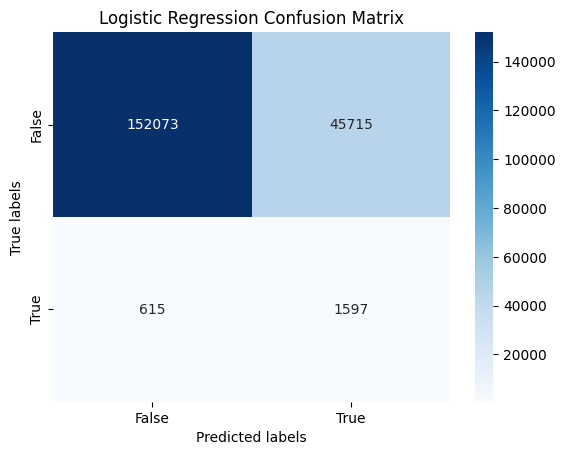

In [ ]:
# Calculating confusion matrix for Logistic Regression model
conf_matrix_lr = confusion_matrix(y_test, logistic_predicti)

# Logistic Regression Confusion Matrix
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0.5, 1.5], ['False', 'True'])  # Adjust tick positions and labels
plt.yticks([0.5, 1.5], ['False', 'True'])
plt.show()



In [ ]:
poly.get_feature_names_out()

array(['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age',
       'days_since_request', 'intended_balcon_amount', 'zip_count_4w',
       'velocity_6h', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'phone_mobile_valid',
       'bank_months_count', 'has_other_cards', 'foreign_request',
       'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w', 'income^2',
       'income name_email_similarity', 'income prev_address_months_count',
       'income current_address_months_count', 'income customer_age',
       'income days_since_request', 'income intended_balcon_amount',
       'income zip_count_4w', 'income velocity_6h',
       'income bank_branch_count_8w',
       'income date_of_birth_distinct_emails_4w',
       'income credit_risk_score', 'income email_is_free',
       'income phone_home_valid', 'income p

In [ ]:

# Feature names from the PolynomialFeatures
feature_names = ['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age',
       'days_since_request', 'intended_balcon_amount', 'zip_count_4w',
       'velocity_6h', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'phone_mobile_valid',
       'bank_months_count', 'has_other_cards', 'foreign_request',
       'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w', 'income^2',
       'income name_email_similarity', 'income prev_address_months_count',
       'income current_address_months_count', 'income customer_age',
       'income days_since_request', 'income intended_balcon_amount',
       'income zip_count_4w', 'income velocity_6h',
       'income bank_branch_count_8w',
       'income date_of_birth_distinct_emails_4w',
       'income credit_risk_score', 'income email_is_free',
       'income phone_home_valid', 'income phone_mobile_valid',
       'income bank_months_count', 'income has_other_cards',
       'income foreign_request', 'income session_length_in_minutes',
       'income keep_alive_session', 'income device_distinct_emails_8w',
       'name_email_similarity^2',
       'name_email_similarity prev_address_months_count',
       'name_email_similarity current_address_months_count',
       'name_email_similarity customer_age',
       'name_email_similarity days_since_request',
       'name_email_similarity intended_balcon_amount',
       'name_email_similarity zip_count_4w',
       'name_email_similarity velocity_6h',
       'name_email_similarity bank_branch_count_8w',
       'name_email_similarity date_of_birth_distinct_emails_4w',
       'name_email_similarity credit_risk_score',
       'name_email_similarity email_is_free',
       'name_email_similarity phone_home_valid',
       'name_email_similarity phone_mobile_valid',
       'name_email_similarity bank_months_count',
       'name_email_similarity has_other_cards',
       'name_email_similarity foreign_request',
       'name_email_similarity session_length_in_minutes',
       'name_email_similarity keep_alive_session',
       'name_email_similarity device_distinct_emails_8w',
       'prev_address_months_count^2',
       'prev_address_months_count current_address_months_count',
       'prev_address_months_count customer_age',
       'prev_address_months_count days_since_request',
       'prev_address_months_count intended_balcon_amount',
       'prev_address_months_count zip_count_4w',
       'prev_address_months_count velocity_6h',
       'prev_address_months_count bank_branch_count_8w',
       'prev_address_months_count date_of_birth_distinct_emails_4w',
       'prev_address_months_count credit_risk_score',
       'prev_address_months_count email_is_free',
       'prev_address_months_count phone_home_valid',
       'prev_address_months_count phone_mobile_valid',
       'prev_address_months_count bank_months_count',
       'prev_address_months_count has_other_cards',
       'prev_address_months_count foreign_request',
       'prev_address_months_count session_length_in_minutes',
       'prev_address_months_count keep_alive_session',
       'prev_address_months_count device_distinct_emails_8w',
       'current_address_months_count^2',
       'current_address_months_count customer_age',
       'current_address_months_count days_since_request',
       'current_address_months_count intended_balcon_amount',
       'current_address_months_count zip_count_4w',
       'current_address_months_count velocity_6h',
       'current_address_months_count bank_branch_count_8w',
       'current_address_months_count date_of_birth_distinct_emails_4w',
       'current_address_months_count credit_risk_score',
       'current_address_months_count email_is_free',
       'current_address_months_count phone_home_valid',
       'current_address_months_count phone_mobile_valid',
       'current_address_months_count bank_months_count',
       'current_address_months_count has_other_cards',
       'current_address_months_count foreign_request',
       'current_address_months_count session_length_in_minutes',
       'current_address_months_count keep_alive_session',
       'current_address_months_count device_distinct_emails_8w',
       'customer_age^2', 'customer_age days_since_request',
       'customer_age intended_balcon_amount', 'customer_age zip_count_4w',
       'customer_age velocity_6h', 'customer_age bank_branch_count_8w',
       'customer_age date_of_birth_distinct_emails_4w',
       'customer_age credit_risk_score', 'customer_age email_is_free',
       'customer_age phone_home_valid', 'customer_age phone_mobile_valid',
       'customer_age bank_months_count', 'customer_age has_other_cards',
       'customer_age foreign_request',
       'customer_age session_length_in_minutes',
       'customer_age keep_alive_session',
       'customer_age device_distinct_emails_8w', 'days_since_request^2',
       'days_since_request intended_balcon_amount',
       'days_since_request zip_count_4w',
       'days_since_request velocity_6h',
       'days_since_request bank_branch_count_8w',
       'days_since_request date_of_birth_distinct_emails_4w',
       'days_since_request credit_risk_score',
       'days_since_request email_is_free',
       'days_since_request phone_home_valid',
       'days_since_request phone_mobile_valid',
       'days_since_request bank_months_count',
       'days_since_request has_other_cards',
       'days_since_request foreign_request',
       'days_since_request session_length_in_minutes',
       'days_since_request keep_alive_session',
       'days_since_request device_distinct_emails_8w',
       'intended_balcon_amount^2', 'intended_balcon_amount zip_count_4w',
       'intended_balcon_amount velocity_6h',
       'intended_balcon_amount bank_branch_count_8w',
       'intended_balcon_amount date_of_birth_distinct_emails_4w',
       'intended_balcon_amount credit_risk_score',
       'intended_balcon_amount email_is_free',
       'intended_balcon_amount phone_home_valid',
       'intended_balcon_amount phone_mobile_valid',
       'intended_balcon_amount bank_months_count',
       'intended_balcon_amount has_other_cards',
       'intended_balcon_amount foreign_request',
       'intended_balcon_amount session_length_in_minutes',
       'intended_balcon_amount keep_alive_session',
       'intended_balcon_amount device_distinct_emails_8w',
       'zip_count_4w^2', 'zip_count_4w velocity_6h',
       'zip_count_4w bank_branch_count_8w',
       'zip_count_4w date_of_birth_distinct_emails_4w',
       'zip_count_4w credit_risk_score', 'zip_count_4w email_is_free',
       'zip_count_4w phone_home_valid', 'zip_count_4w phone_mobile_valid',
       'zip_count_4w bank_months_count', 'zip_count_4w has_other_cards',
       'zip_count_4w foreign_request',
       'zip_count_4w session_length_in_minutes',
       'zip_count_4w keep_alive_session',
       'zip_count_4w device_distinct_emails_8w', 'velocity_6h^2',
       'velocity_6h bank_branch_count_8w',
       'velocity_6h date_of_birth_distinct_emails_4w',
       'velocity_6h credit_risk_score', 'velocity_6h email_is_free',
       'velocity_6h phone_home_valid', 'velocity_6h phone_mobile_valid',
       'velocity_6h bank_months_count', 'velocity_6h has_other_cards',
       'velocity_6h foreign_request',
       'velocity_6h session_length_in_minutes',
       'velocity_6h keep_alive_session',
       'velocity_6h device_distinct_emails_8w', 'bank_branch_count_8w^2',
       'bank_branch_count_8w date_of_birth_distinct_emails_4w',
       'bank_branch_count_8w credit_risk_score',
       'bank_branch_count_8w email_is_free',
       'bank_branch_count_8w phone_home_valid',
       'bank_branch_count_8w phone_mobile_valid',
       'bank_branch_count_8w bank_months_count',
       'bank_branch_count_8w has_other_cards',
       'bank_branch_count_8w foreign_request',
       'bank_branch_count_8w session_length_in_minutes',
       'bank_branch_count_8w keep_alive_session',
       'bank_branch_count_8w device_distinct_emails_8w',
       'date_of_birth_distinct_emails_4w^2',
       'date_of_birth_distinct_emails_4w credit_risk_score',
       'date_of_birth_distinct_emails_4w email_is_free',
       'date_of_birth_distinct_emails_4w phone_home_valid',
       'date_of_birth_distinct_emails_4w phone_mobile_valid',
       'date_of_birth_distinct_emails_4w bank_months_count',
       'date_of_birth_distinct_emails_4w has_other_cards',
       'date_of_birth_distinct_emails_4w foreign_request',
       'date_of_birth_distinct_emails_4w session_length_in_minutes',
       'date_of_birth_distinct_emails_4w keep_alive_session',
       'date_of_birth_distinct_emails_4w device_distinct_emails_8w',
       'credit_risk_score^2', 'credit_risk_score email_is_free',
       'credit_risk_score phone_home_valid',
       'credit_risk_score phone_mobile_valid',
       'credit_risk_score bank_months_count',
       'credit_risk_score has_other_cards',
       'credit_risk_score foreign_request',
       'credit_risk_score session_length_in_minutes',
       'credit_risk_score keep_alive_session',
       'credit_risk_score device_distinct_emails_8w', 'email_is_free^2',
       'email_is_free phone_home_valid',
       'email_is_free phone_mobile_valid',
       'email_is_free bank_months_count', 'email_is_free has_other_cards',
       'email_is_free foreign_request',
       'email_is_free session_length_in_minutes',
       'email_is_free keep_alive_session',
       'email_is_free device_distinct_emails_8w', 'phone_home_valid^2',
       'phone_home_valid phone_mobile_valid',
       'phone_home_valid bank_months_count',
       'phone_home_valid has_other_cards',
       'phone_home_valid foreign_request',
       'phone_home_valid session_length_in_minutes',
       'phone_home_valid keep_alive_session',
       'phone_home_valid device_distinct_emails_8w',
       'phone_mobile_valid^2', 'phone_mobile_valid bank_months_count',
       'phone_mobile_valid has_other_cards',
       'phone_mobile_valid foreign_request',
       'phone_mobile_valid session_length_in_minutes',
       'phone_mobile_valid keep_alive_session',
       'phone_mobile_valid device_distinct_emails_8w',
       'bank_months_count^2', 'bank_months_count has_other_cards',
       'bank_months_count foreign_request',
       'bank_months_count session_length_in_minutes',
       'bank_months_count keep_alive_session',
       'bank_months_count device_distinct_emails_8w', 'has_other_cards^2',
       'has_other_cards foreign_request',
       'has_other_cards session_length_in_minutes',
       'has_other_cards keep_alive_session',
       'has_other_cards device_distinct_emails_8w', 'foreign_request^2',
       'foreign_request session_length_in_minutes',
       'foreign_request keep_alive_session',
       'foreign_request device_distinct_emails_8w',
       'session_length_in_minutes^2',
       'session_length_in_minutes keep_alive_session',
       'session_length_in_minutes device_distinct_emails_8w',
       'keep_alive_session^2',
       'keep_alive_session device_distinct_emails_8w',
       'device_distinct_emails_8w^2']  # Replace with your list of feature names


coefficients = logistic_model.coef_[0]

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Calculate the absolute value of coefficients to determine importance
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()

# Sort the features by absolute coefficient in descending order
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the sorted feature importance
print(feature_importance)


                                               Feature  Coefficient  \
2                            prev_address_months_count    -1.475384   
9                                 bank_branch_count_8w    -1.118568   
81                      current_address_months_count^2    -1.040891   
1                                name_email_similarity    -1.011642   
3                         current_address_months_count     0.866704   
..                                                 ...          ...   
236        bank_months_count device_distinct_emails_8w     0.000522   
121  days_since_request date_of_birth_distinct_emai...     0.000478   
184            bank_branch_count_8w keep_alive_session     0.000357   
152                         zip_count_4w email_is_free    -0.000283   
86            current_address_months_count velocity_6h     0.000175   

     Absolute_Coefficient  
2                1.475384  
9                1.118568  
81               1.040891  
1                1.011642  
3      

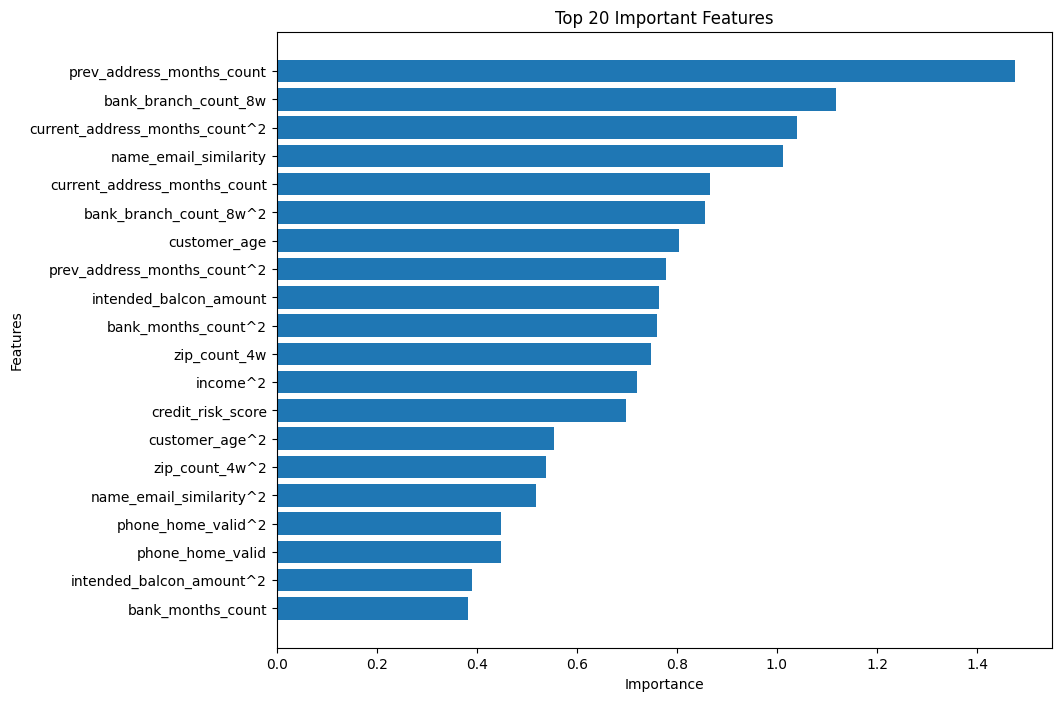

In [ ]:

top_20_features = feature_importance.head(20)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(top_20_features['Feature'], top_20_features['Absolute_Coefficient'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Important Features')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


In [ ]:
feature_importance.head(10)

,Feature,Coefficient,Absolute_Coefficient
2,prev_address_months_count,-1.475384,1.475384
9,bank_branch_count_8w,-1.118568,1.118568
81,current_address_months_count^2,-1.040891,1.040891
1,name_email_similarity,-1.011642,1.011642
3,current_address_months_count,0.866704,0.866704
174,bank_branch_count_8w^2,0.856329,0.856329
4,customer_age,0.805105,0.805105
62,prev_address_months_count^2,0.777793,0.777793
6,intended_balcon_amount,-0.764052,0.764052
231,bank_months_count^2,0.760600,0.760600


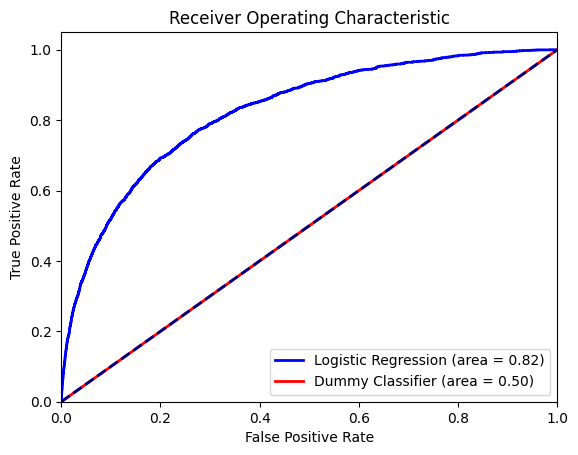

In [ ]:
lr_probs = logistic_model.predict_proba(X_test)[:, 1]

dummy_probs = dummy_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Compute ROC curve and ROC area for Dummy Classifier
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, dummy_probs)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

# Plotting the ROC curves
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_dummy, tpr_dummy, color='red', lw=2, label='Dummy Classifier (area = %0.2f)' % roc_auc_dummy)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Random Forest

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_variable, y_variable, test_size=0.2,random_state=42)


# # Applying SMOTE only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Fitting the Logistic Regression model on the resampled training set
# model = LogisticRegression(max_iter=100, solver='newton-cholesky', random_state=42)

# model = SVC(max_iter=100, kernel='rbf', random_state=42)

random_forest_model = RandomForestClassifier(
        max_depth=5, n_estimators=100, max_features='sqrt', random_state=42)

# model = GaussianNB()


random_forest_model.fit(X_resampled, y_resampled)

# Making predictions on the test set
rf_predictions = random_forest_model.predict(X_test)


In [ ]:
# Fitting a Dummy Classifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)

# Making predictions with Dummy Classifier
dummy_predictions = dummy_clf.predict(X_test)

# Calculating metrics for Logistic Regression model
accuracy_lr = accuracy_score(y_test, rf_predictions)
precision_lr = precision_score(y_test, rf_predictions)
recall_lr = recall_score(y_test, rf_predictions)
f1_lr = f1_score(y_test, rf_predictions)

# Calculating metrics for Dummy Classifier
accuracy_dummy = accuracy_score(y_test, dummy_predictions)
precision_dummy = precision_score(y_test, dummy_predictions)
recall_dummy = recall_score(y_test, dummy_predictions)
f1_dummy = f1_score(y_test, dummy_predictions)

# Printing the metrics for comparison
print("Random Forest vs Dummy Classifier")
print("---------------------------------------")
print(f"Accuracy:  {accuracy_lr:.4f} vs {accuracy_dummy:.4f}")
print(f"Precision: {precision_lr:.4f} vs {precision_dummy:.4f}")
print(f"Recall:    {recall_lr:.4f} vs {recall_dummy:.4f}")
print(f"F1 Score:  {f1_lr:.4f} vs {f1_dummy:.4f}")


Random Forest vs Dummy Classifier
---------------------------------------
Accuracy:  0.7739 vs 0.9889
Precision: 0.0329 vs 0.0000
Recall:    0.6849 vs 0.0000
F1 Score:  0.0628 vs 0.0000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


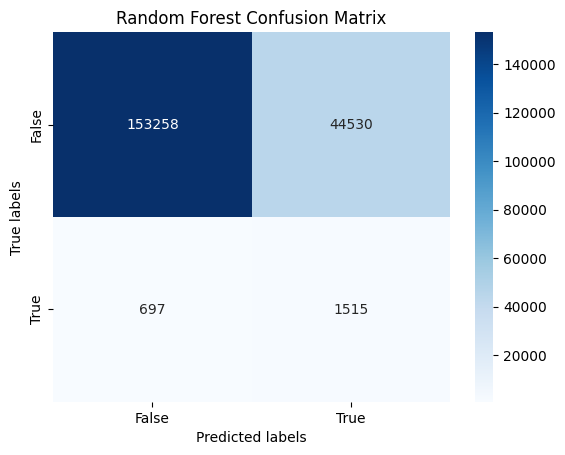

In [ ]:

conf_matrix_rf = confusion_matrix(y_test, rf_predictions)

sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0.5, 1.5], ['False', 'True'])  # Adjust tick positions and labels
plt.yticks([0.5, 1.5], ['False', 'True'])
plt.show()



In [ ]:
conf_matrix_rf

array([[153258,  44530],
       [   697,   1515]])

In [ ]:
poly.get_feature_names_out()

array(['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age',
       'days_since_request', 'intended_balcon_amount', 'zip_count_4w',
       'velocity_6h', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'phone_mobile_valid',
       'bank_months_count', 'has_other_cards', 'foreign_request',
       'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w', 'income^2',
       'income name_email_similarity', 'income prev_address_months_count',
       'income current_address_months_count', 'income customer_age',
       'income days_since_request', 'income intended_balcon_amount',
       'income zip_count_4w', 'income velocity_6h',
       'income bank_branch_count_8w',
       'income date_of_birth_distinct_emails_4w',
       'income credit_risk_score', 'income email_is_free',
       'income phone_home_valid', 'income p

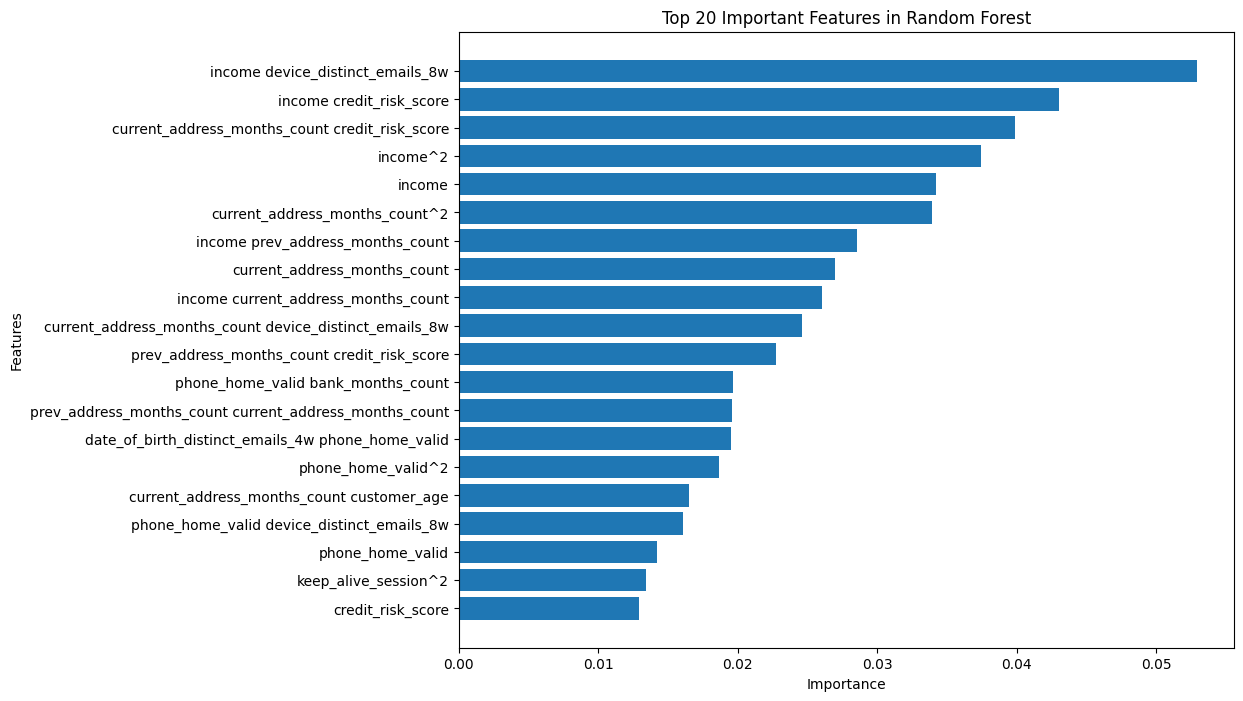

In [ ]:

# Feature names from the PolynomialFeatures
feature_names = ['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age',
       'days_since_request', 'intended_balcon_amount', 'zip_count_4w',
       'velocity_6h', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'phone_mobile_valid',
       'bank_months_count', 'has_other_cards', 'foreign_request',
       'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w', 'income^2',
       'income name_email_similarity', 'income prev_address_months_count',
       'income current_address_months_count', 'income customer_age',
       'income days_since_request', 'income intended_balcon_amount',
       'income zip_count_4w', 'income velocity_6h',
       'income bank_branch_count_8w',
       'income date_of_birth_distinct_emails_4w',
       'income credit_risk_score', 'income email_is_free',
       'income phone_home_valid', 'income phone_mobile_valid',
       'income bank_months_count', 'income has_other_cards',
       'income foreign_request', 'income session_length_in_minutes',
       'income keep_alive_session', 'income device_distinct_emails_8w',
       'name_email_similarity^2',
       'name_email_similarity prev_address_months_count',
       'name_email_similarity current_address_months_count',
       'name_email_similarity customer_age',
       'name_email_similarity days_since_request',
       'name_email_similarity intended_balcon_amount',
       'name_email_similarity zip_count_4w',
       'name_email_similarity velocity_6h',
       'name_email_similarity bank_branch_count_8w',
       'name_email_similarity date_of_birth_distinct_emails_4w',
       'name_email_similarity credit_risk_score',
       'name_email_similarity email_is_free',
       'name_email_similarity phone_home_valid',
       'name_email_similarity phone_mobile_valid',
       'name_email_similarity bank_months_count',
       'name_email_similarity has_other_cards',
       'name_email_similarity foreign_request',
       'name_email_similarity session_length_in_minutes',
       'name_email_similarity keep_alive_session',
       'name_email_similarity device_distinct_emails_8w',
       'prev_address_months_count^2',
       'prev_address_months_count current_address_months_count',
       'prev_address_months_count customer_age',
       'prev_address_months_count days_since_request',
       'prev_address_months_count intended_balcon_amount',
       'prev_address_months_count zip_count_4w',
       'prev_address_months_count velocity_6h',
       'prev_address_months_count bank_branch_count_8w',
       'prev_address_months_count date_of_birth_distinct_emails_4w',
       'prev_address_months_count credit_risk_score',
       'prev_address_months_count email_is_free',
       'prev_address_months_count phone_home_valid',
       'prev_address_months_count phone_mobile_valid',
       'prev_address_months_count bank_months_count',
       'prev_address_months_count has_other_cards',
       'prev_address_months_count foreign_request',
       'prev_address_months_count session_length_in_minutes',
       'prev_address_months_count keep_alive_session',
       'prev_address_months_count device_distinct_emails_8w',
       'current_address_months_count^2',
       'current_address_months_count customer_age',
       'current_address_months_count days_since_request',
       'current_address_months_count intended_balcon_amount',
       'current_address_months_count zip_count_4w',
       'current_address_months_count velocity_6h',
       'current_address_months_count bank_branch_count_8w',
       'current_address_months_count date_of_birth_distinct_emails_4w',
       'current_address_months_count credit_risk_score',
       'current_address_months_count email_is_free',
       'current_address_months_count phone_home_valid',
       'current_address_months_count phone_mobile_valid',
       'current_address_months_count bank_months_count',
       'current_address_months_count has_other_cards',
       'current_address_months_count foreign_request',
       'current_address_months_count session_length_in_minutes',
       'current_address_months_count keep_alive_session',
       'current_address_months_count device_distinct_emails_8w',
       'customer_age^2', 'customer_age days_since_request',
       'customer_age intended_balcon_amount', 'customer_age zip_count_4w',
       'customer_age velocity_6h', 'customer_age bank_branch_count_8w',
       'customer_age date_of_birth_distinct_emails_4w',
       'customer_age credit_risk_score', 'customer_age email_is_free',
       'customer_age phone_home_valid', 'customer_age phone_mobile_valid',
       'customer_age bank_months_count', 'customer_age has_other_cards',
       'customer_age foreign_request',
       'customer_age session_length_in_minutes',
       'customer_age keep_alive_session',
       'customer_age device_distinct_emails_8w', 'days_since_request^2',
       'days_since_request intended_balcon_amount',
       'days_since_request zip_count_4w',
       'days_since_request velocity_6h',
       'days_since_request bank_branch_count_8w',
       'days_since_request date_of_birth_distinct_emails_4w',
       'days_since_request credit_risk_score',
       'days_since_request email_is_free',
       'days_since_request phone_home_valid',
       'days_since_request phone_mobile_valid',
       'days_since_request bank_months_count',
       'days_since_request has_other_cards',
       'days_since_request foreign_request',
       'days_since_request session_length_in_minutes',
       'days_since_request keep_alive_session',
       'days_since_request device_distinct_emails_8w',
       'intended_balcon_amount^2', 'intended_balcon_amount zip_count_4w',
       'intended_balcon_amount velocity_6h',
       'intended_balcon_amount bank_branch_count_8w',
       'intended_balcon_amount date_of_birth_distinct_emails_4w',
       'intended_balcon_amount credit_risk_score',
       'intended_balcon_amount email_is_free',
       'intended_balcon_amount phone_home_valid',
       'intended_balcon_amount phone_mobile_valid',
       'intended_balcon_amount bank_months_count',
       'intended_balcon_amount has_other_cards',
       'intended_balcon_amount foreign_request',
       'intended_balcon_amount session_length_in_minutes',
       'intended_balcon_amount keep_alive_session',
       'intended_balcon_amount device_distinct_emails_8w',
       'zip_count_4w^2', 'zip_count_4w velocity_6h',
       'zip_count_4w bank_branch_count_8w',
       'zip_count_4w date_of_birth_distinct_emails_4w',
       'zip_count_4w credit_risk_score', 'zip_count_4w email_is_free',
       'zip_count_4w phone_home_valid', 'zip_count_4w phone_mobile_valid',
       'zip_count_4w bank_months_count', 'zip_count_4w has_other_cards',
       'zip_count_4w foreign_request',
       'zip_count_4w session_length_in_minutes',
       'zip_count_4w keep_alive_session',
       'zip_count_4w device_distinct_emails_8w', 'velocity_6h^2',
       'velocity_6h bank_branch_count_8w',
       'velocity_6h date_of_birth_distinct_emails_4w',
       'velocity_6h credit_risk_score', 'velocity_6h email_is_free',
       'velocity_6h phone_home_valid', 'velocity_6h phone_mobile_valid',
       'velocity_6h bank_months_count', 'velocity_6h has_other_cards',
       'velocity_6h foreign_request',
       'velocity_6h session_length_in_minutes',
       'velocity_6h keep_alive_session',
       'velocity_6h device_distinct_emails_8w', 'bank_branch_count_8w^2',
       'bank_branch_count_8w date_of_birth_distinct_emails_4w',
       'bank_branch_count_8w credit_risk_score',
       'bank_branch_count_8w email_is_free',
       'bank_branch_count_8w phone_home_valid',
       'bank_branch_count_8w phone_mobile_valid',
       'bank_branch_count_8w bank_months_count',
       'bank_branch_count_8w has_other_cards',
       'bank_branch_count_8w foreign_request',
       'bank_branch_count_8w session_length_in_minutes',
       'bank_branch_count_8w keep_alive_session',
       'bank_branch_count_8w device_distinct_emails_8w',
       'date_of_birth_distinct_emails_4w^2',
       'date_of_birth_distinct_emails_4w credit_risk_score',
       'date_of_birth_distinct_emails_4w email_is_free',
       'date_of_birth_distinct_emails_4w phone_home_valid',
       'date_of_birth_distinct_emails_4w phone_mobile_valid',
       'date_of_birth_distinct_emails_4w bank_months_count',
       'date_of_birth_distinct_emails_4w has_other_cards',
       'date_of_birth_distinct_emails_4w foreign_request',
       'date_of_birth_distinct_emails_4w session_length_in_minutes',
       'date_of_birth_distinct_emails_4w keep_alive_session',
       'date_of_birth_distinct_emails_4w device_distinct_emails_8w',
       'credit_risk_score^2', 'credit_risk_score email_is_free',
       'credit_risk_score phone_home_valid',
       'credit_risk_score phone_mobile_valid',
       'credit_risk_score bank_months_count',
       'credit_risk_score has_other_cards',
       'credit_risk_score foreign_request',
       'credit_risk_score session_length_in_minutes',
       'credit_risk_score keep_alive_session',
       'credit_risk_score device_distinct_emails_8w', 'email_is_free^2',
       'email_is_free phone_home_valid',
       'email_is_free phone_mobile_valid',
       'email_is_free bank_months_count', 'email_is_free has_other_cards',
       'email_is_free foreign_request',
       'email_is_free session_length_in_minutes',
       'email_is_free keep_alive_session',
       'email_is_free device_distinct_emails_8w', 'phone_home_valid^2',
       'phone_home_valid phone_mobile_valid',
       'phone_home_valid bank_months_count',
       'phone_home_valid has_other_cards',
       'phone_home_valid foreign_request',
       'phone_home_valid session_length_in_minutes',
       'phone_home_valid keep_alive_session',
       'phone_home_valid device_distinct_emails_8w',
       'phone_mobile_valid^2', 'phone_mobile_valid bank_months_count',
       'phone_mobile_valid has_other_cards',
       'phone_mobile_valid foreign_request',
       'phone_mobile_valid session_length_in_minutes',
       'phone_mobile_valid keep_alive_session',
       'phone_mobile_valid device_distinct_emails_8w',
       'bank_months_count^2', 'bank_months_count has_other_cards',
       'bank_months_count foreign_request',
       'bank_months_count session_length_in_minutes',
       'bank_months_count keep_alive_session',
       'bank_months_count device_distinct_emails_8w', 'has_other_cards^2',
       'has_other_cards foreign_request',
       'has_other_cards session_length_in_minutes',
       'has_other_cards keep_alive_session',
       'has_other_cards device_distinct_emails_8w', 'foreign_request^2',
       'foreign_request session_length_in_minutes',
       'foreign_request keep_alive_session',
       'foreign_request device_distinct_emails_8w',
       'session_length_in_minutes^2',
       'session_length_in_minutes keep_alive_session',
       'session_length_in_minutes device_distinct_emails_8w',
       'keep_alive_session^2',
       'keep_alive_session device_distinct_emails_8w',
       'device_distinct_emails_8w^2']

# Get feature importances from the random forest model
importances = random_forest_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Selecting the top 20 features
top_20_features_rf = feature_importance_rf.head(20)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(top_20_features_rf['Feature'], top_20_features_rf['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Important Features in Random Forest')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


In [ ]:
feature_importance_rf.head(10)

,Feature,Importance
41,income device_distinct_emails_8w,0.052894
32,income credit_risk_score,0.043009
89,current_address_months_count credit_risk_score,0.039879
21,income^2,0.037466
0,income,0.034180
81,current_address_months_count^2,0.033947
23,income prev_address_months_count,0.028579
3,current_address_months_count,0.026993
24,income current_address_months_count,0.026053
98,current_address_months_count device_distinct_e...,0.024629


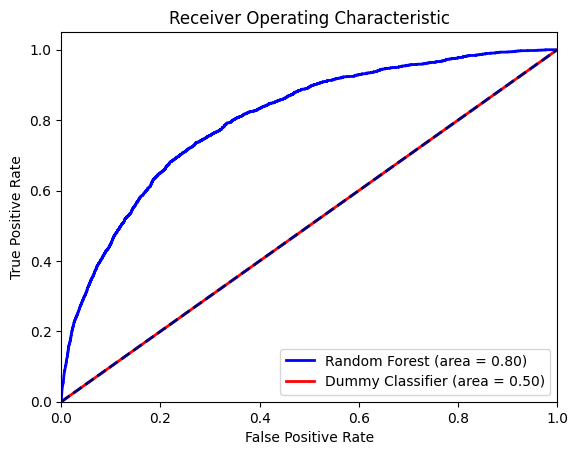

In [ ]:
# Obtain the probabilities for the Random Forest model
rf_probs = random_forest_model.predict_proba(X_test)[:, 1]

# For the Dummy Classifier, as before, we take the probability of the positive class
dummy_probs = dummy_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Compute ROC curve and ROC area for Dummy Classifier
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, dummy_probs)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

# Plotting the ROC curves
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dummy, tpr_dummy, color='red', lw=2, label='Dummy Classifier (area = %0.2f)' % roc_auc_dummy)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Naive Bayes

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_variable, y_variable, test_size=0.2,random_state=42)


# # Applying SMOTE only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Fitting the Logistic Regression model on the resampled training set
# model = LogisticRegression(max_iter=100, solver='newton-cholesky', random_state=42)

# model = SVC(max_iter=100, kernel='rbf', random_state=42)

# model = RandomForestClassifier(
#         max_depth=5, n_estimators=100, max_features='sqrt', random_state=42)

naive_bayes_model = GaussianNB()


naive_bayes_model.fit(X_resampled, y_resampled)

# Making predictions on the test set
nb_predictions = naive_bayes_model.predict(X_test)


In [ ]:
# Fitting a Dummy Classifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)

# Making predictions with Dummy Classifier
dummy_predictions = dummy_clf.predict(X_test)

# Calculating metrics for Logistic Regression model
accuracy_lr = accuracy_score(y_test, nb_predictions)
precision_lr = precision_score(y_test, nb_predictions)
recall_lr = recall_score(y_test, nb_predictions)
f1_lr = f1_score(y_test, nb_predictions)

# Calculating metrics for Dummy Classifier
accuracy_dummy = accuracy_score(y_test, dummy_predictions)
precision_dummy = precision_score(y_test, dummy_predictions)
recall_dummy = recall_score(y_test, dummy_predictions)
f1_dummy = f1_score(y_test, dummy_predictions)

# Printing the metrics for comparison
print("Naive Bayes vs Dummy Classifier")
print("---------------------------------------")
print(f"Accuracy:  {accuracy_lr:.4f} vs {accuracy_dummy:.4f}")
print(f"Precision: {precision_lr:.4f} vs {precision_dummy:.4f}")
print(f"Recall:    {recall_lr:.4f} vs {recall_dummy:.4f}")
print(f"F1 Score:  {f1_lr:.4f} vs {f1_dummy:.4f}")


Naive Bayes vs Dummy Classifier
---------------------------------------
Accuracy:  0.5267 vs 0.9889
Precision: 0.0182 vs 0.0000
Recall:    0.7875 vs 0.0000
F1 Score:  0.0355 vs 0.0000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


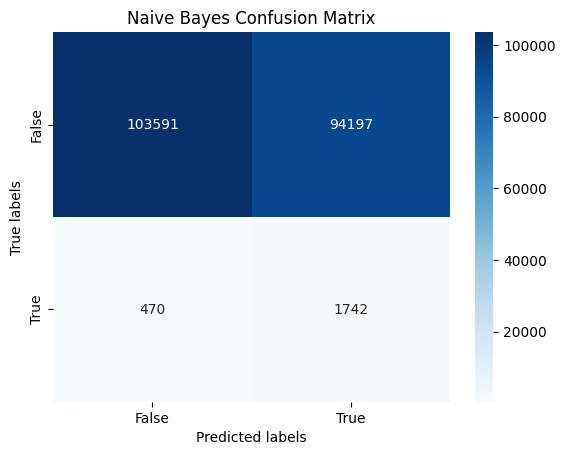

In [ ]:
# Calculating confusion matrix for Logistic Regression model
conf_matrix_nb = confusion_matrix(y_test, nb_predictions)

# Logistic Regression Confusion Matrix
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0.5, 1.5], ['False', 'True'])  # Adjust tick positions and labels
plt.yticks([0.5, 1.5], ['False', 'True'])
plt.show()



In [ ]:
conf_matrix_nb

array([[103591,  94197],
       [   470,   1742]])

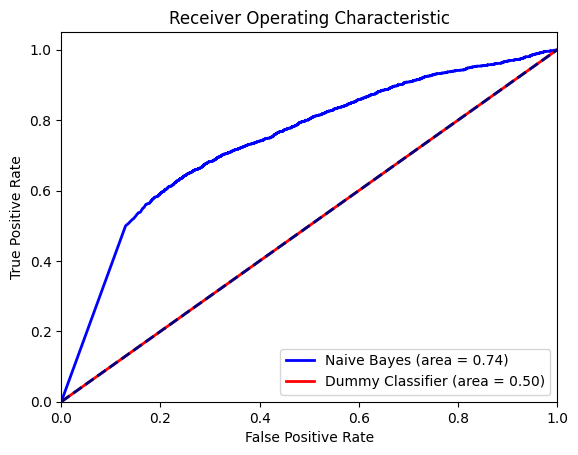

In [ ]:
# Obtain the probabilities for the Random Forest model
rf_probs = naive_bayes_model.predict_proba(X_test)[:, 1]

# For the Dummy Classifier, as before, we take the probability of the positive class
dummy_probs = dummy_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Compute ROC curve and ROC area for Dummy Classifier
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, dummy_probs)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

# Plotting the ROC curves
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Naive Bayes (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dummy, tpr_dummy, color='red', lw=2, label='Dummy Classifier (area = %0.2f)' % roc_auc_dummy)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Ensemble

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_variable, y_variable, test_size=0.2,random_state=42)

# Applying SMOTE only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Constructing an ensemble model
def ensemble_predict(models, X):
    predictions = [model.predict(X) for model in models]
    return pd.DataFrame(predictions).mode().iloc[0]

# Making predictions on the test set
ensemble_models = [logistic_model, random_forest_model, naive_bayes_model]
predictions = ensemble_predict(ensemble_models, X_test)

In [ ]:
# Fitting a Dummy Classifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)

# Making predictions with Dummy Classifier
dummy_predictions = dummy_clf.predict(X_test)

# Calculating metrics for Logistic Regression model
accuracy_ensemble = accuracy_score(y_test, predictions)
precision_ensemble = precision_score(y_test, predictions)
recall_ensemble = recall_score(y_test, predictions)
f1_ensemble = f1_score(y_test, predictions)

# Calculating metrics for Dummy Classifier
accuracy_dummy = accuracy_score(y_test, dummy_predictions)
precision_dummy = precision_score(y_test, dummy_predictions)
recall_dummy = recall_score(y_test, dummy_predictions)
f1_dummy = f1_score(y_test, dummy_predictions)

# Printing the metrics for comparison
print("Ensemble Learning vs Dummy Classifier")
print("---------------------------------------")
print(f"Accuracy:  {accuracy_ensemble:.4f} vs {accuracy_dummy:.4f}")
print(f"Precision: {precision_ensemble:.4f} vs {precision_dummy:.4f}")
print(f"Recall:    {recall_ensemble:.4f} vs {recall_dummy:.4f}")
print(f"F1 Score:  {f1_ensemble:.4f} vs {f1_dummy:.4f}")

Ensemble Learning vs Dummy Classifier
---------------------------------------
Accuracy:  0.7450 vs 0.9889
Precision: 0.0314 vs 0.0000
Recall:    0.7401 vs 0.0000
F1 Score:  0.0603 vs 0.0000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


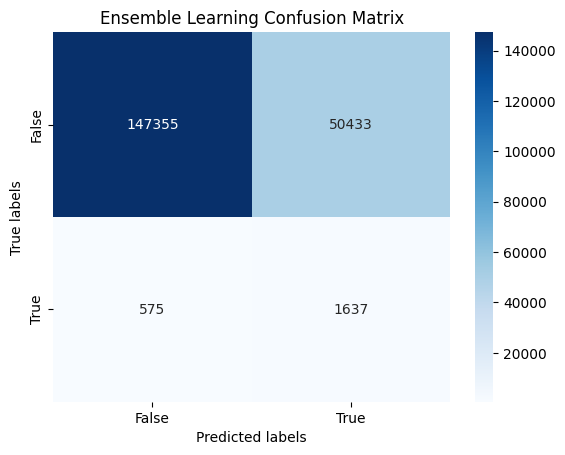

In [ ]:
# Calculating confusion matrix for Logistic Regression model
conf_matrix_el = confusion_matrix(y_test, predictions)

# Logistic Regression Confusion Matrix
sns.heatmap(conf_matrix_el, annot=True, fmt="d", cmap='Blues')
plt.title('Ensemble Learning Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0.5, 1.5], ['False', 'True'])  # Adjust tick positions and labels
plt.yticks([0.5, 1.5], ['False', 'True'])
plt.show()

In [ ]:
conf_matrix_el

array([[147355,  50433],
       [   575,   1637]])

ROC AUC: 0.802


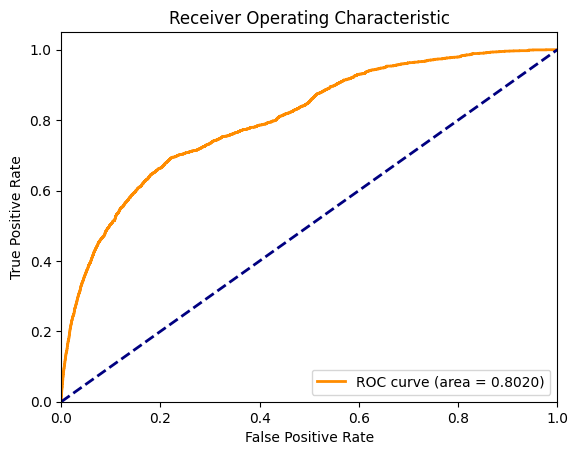

In [ ]:
# Modified ensemble predict to average probabilities
def ensemble_predict_proba(models, X):
    # Ensure all models have a predict_proba method
    if not all(hasattr(model, 'predict_proba') for model in models):
        raise ValueError("All models must have a predict_proba method")

    # Averaging predicted probabilities
    predictions_proba = np.mean([model.predict_proba(X)[:, 1] for model in models], axis=0)
    return predictions_proba

# Predict probabilities for the test set
probabilities = ensemble_predict_proba(ensemble_models, X_test)

# Compute ROC AUC
roc_auc = round(roc_auc_score(y_test, probabilities), 3)
print(f"ROC AUC: {roc_auc}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Evaluate

Logistic Regression vs Dummy Classifier
---------------------------------------
Accuracy:  0.7683 vs 0.9889
Precision: 0.0338 vs 0.0000
Recall:    0.7220 vs 0.0000
F1 Score:  0.0645 vs 0.0000

Random Forest vs Dummy Classifier
---------------------------------------
Accuracy:  0.7739 vs 0.9889
Precision: 0.0329 vs 0.0000
Recall:    0.6849 vs 0.0000
F1 Score:  0.0628 vs 0.0000

Naive Bayes vs Dummy Classifier
---------------------------------------
Accuracy:  0.5267 vs 0.9889
Precision: 0.0182 vs 0.0000
Recall:    0.7875 vs 0.0000
F1 Score:  0.0355 vs 0.0000

Ensemble Learning vs Dummy Classifier
---------------------------------------
Accuracy:  0.7450 vs 0.9889
Precision: 0.0314 vs 0.0000
Recall:    0.7401 vs 0.0000
F1 Score:  0.0603 vs 0.0000

## Visualize

In [ ]:
# Define function to get metrics
def get_metrics(model_name, predictions):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    return accuracy, precision, recall, f1

# Define function to plot ROC curve and display metrics
def plot_roc_and_display_metrics(selected_models):
    metrics_data = []
    plt.figure(figsize=(8, 6))

    for model_name in selected_models:
        if model_name == 'Logistic Regression':
            probs = logistic_model.predict_proba(X_test)[:, 1]
            color = 'blue'
            predictions = logistic_model.predict(X_test)
        elif model_name == 'Random Forest':
            probs = random_forest_model.predict_proba(X_test)[:, 1]
            color = 'green'
            predictions = random_forest_model.predict(X_test)
        elif model_name == 'Naive Bayes':
            probs = naive_bayes_model.predict_proba(X_test)[:, 1]
            color = 'orange'
            predictions = naive_bayes_model.predict(X_test)
        elif model_name == 'Ensemble Learning':
            probs = ensemble_predict_proba(ensemble_models, X_test)
            predictions = ensemble_predict(ensemble_models, X_test)
            color = 'red'

        fpr, tpr, _ = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=color, label=f'{model_name} (area = {roc_auc:.4f})')

        accuracy, precision, recall, f1 = get_metrics(model_name, predictions)
        metrics_data.append([model_name, accuracy, precision, recall, f1, roc_auc])

    # Plot ROC Curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Polynomial Model Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Display Metrics Table
    metrics_df = pd.DataFrame(metrics_data, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
    display(metrics_df)

# Widget setup
select_models = widgets.SelectMultiple(
    options=['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble Learning'],
    value=['Logistic Regression'],
    description='Models',
    disabled=False
)

output = widgets.Output()

def on_model_change(change):
    with output:
        clear_output(wait=True)
        plot_roc_and_display_metrics(change.new)

select_models.observe(on_model_change, names='value')

display(select_models, output)


SelectMultiple(description='Models', index=(0,), options=('Logistic Regression', 'Random Forest', 'Naive Bayes…

Output()

## Feature Importance

In [ ]:
# Rename output widget for feature importance
output_feature_importance = widgets.Output()

def plot_feature_importance(model_name, top_features):
    if model_name == 'Logistic Regression':
        feature_importance_all = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)
        importance_col = 'Absolute_Coefficient'  # Column name for importance in logistic regression
        title = 'Polynomial Method - Feature Importance for Logistic Regression Model'
    elif model_name == 'Random Forest':
        feature_importance_all = feature_importance_rf.sort_values(by='Importance', ascending=False)
        importance_col = 'Importance'  # Column name for importance in random forest
        title = 'Polynomial Method - Feature Importance for Random Forest Model'
    else:
        return

    # Keep only the top features as specified
    feature_importance_all = feature_importance_all.head(int(top_features))

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance_all[importance_col], y=feature_importance_all['Feature'])
    plt.title(title)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Feature')
    plt.show()

# Widget for selecting the model
model_selector_feature_importance = widgets.ToggleButtons(
    options=['Logistic Regression', 'Random Forest'],
    value='Logistic Regression',
    description='Algorithm:',
)

# Widget for selecting the number of top features to display
feature_count_selector_feature_importance = widgets.ToggleButtons(
    options=['5', '10', '20'],
    value='10',
    description='Top Features:',
)

# Function to update the feature importance plot based on user selection
def on_feature_importance_change(change):
    with output_feature_importance:
        clear_output(wait=True)
        plot_feature_importance(change.new, feature_count_selector_feature_importance.value)

# Observers for the widgets
model_selector_feature_importance.observe(on_feature_importance_change, names='value')
feature_count_selector_feature_importance.observe(on_feature_importance_change, names='value')

# Display the widgets and the output
display(widgets.VBox([model_selector_feature_importance, feature_count_selector_feature_importance, output_feature_importance]))



### Common top columns of Top 10

current_address_months_count